In [ ]:
!pip install -q --upgrade transformers==4.25.1 diffusers ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.8 MB/s eta 0:00:00


In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO
import os
from os import listdir
from diffusers import StableDiffusionImg2ImgPipeline
import matplotlib.pyplot as plt

In [ ]:
# list of photos in the folder
folder_dir = '/content/drive/MyDrive/CMSC673/data/'
images_dataset = []
for images in os.listdir(folder_dir):
  images_dataset.append(images)

In [ ]:
# dateset with all the photos
dataset = []
for el in images_dataset:
  name = el.replace("'", '')
  dataset.append(Image.open(f'/content/drive/MyDrive/CMSC673/data/{name}'))

In [ ]:
device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

In [ ]:
prompt = "smiling"
smiling_faces = []
i = 0
for el in dataset:
  images = pipe(prompt=prompt, image=el, strength=0.50, guidance_scale=2).images
  smiling_faces.append(images[0])
  images[0].save(f'/content/drive/MyDrive/CMSC673/real_and_fake/fake/fake_photo_{i}.jpg')
  el.save(f'/content/drive/MyDrive/CMSC673/real_and_fake/real/real_photo_{i}.jpg')
  i = i + 1


Some of the pictures were weird so I generated them again (until they were ok)

In [ ]:
lst_pictures_to_improve = [ ]

  0%|          | 0/25 [00:00<?, ?it/s]

462


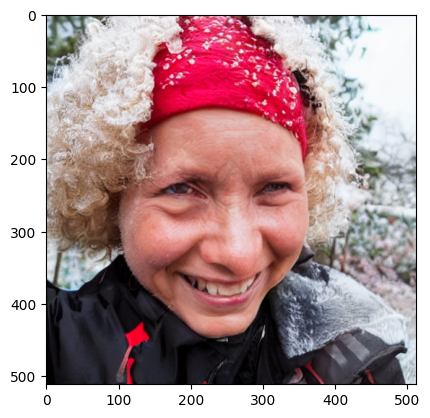

In [ ]:
prompt = "smiling"
smiling_faces = []
for i in lst_pictures_to_improve:
  el = dataset[i]
  images = pipe(prompt=prompt, image=el, strength=0.50, guidance_scale=2).images
  smiling_faces.append([i,images[0]])
  images[0].save(f'/content/drive/MyDrive/CMSC673/real_and_fake/fake/fake_photo_{i}.jpg')
  print(i)
  plt.imshow(images[0])
  plt.show()